In [6]:
!python -m pip install matplotlib numpy

You are using pip version 10.0.1, however version 21.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import numpy as np

def dft_matrix(n: int, inv: bool = False) -> np.ndarray:
    if not isinstance(n, int) or not isinstance(inv, bool):
        raise TypeError()
    if n < 1:
        raise ValueError()
        
    k = np.arange(n)
    w_n = np.exp((2J if inv else -2J) * k * np.pi / n)
    return np.vander(w_n, n, increasing=True) / (n if inv else 1.0)

In [26]:
from numpy.fft import fft, ifft
from numpy.random import normal, randint, randn

for _ in range(100):
    kwargs = {'rtol': 10E-8, 'atol': 10E-8}
    n = randint(100) + 1
    x = randn(n) + 1J * randn(n)

    y = dft_matrix(n) @ x
    assert np.allclose(y, fft(x), **kwargs)
    x = dft_matrix(n, inv=True) @ y
    assert np.allclose(x, ifft(y), **kwargs)

In [9]:
from math import cos, pi, sin

def f(x: float) -> float:
    return 7.0 * sin(x) + 5.0 * cos(x * 7.0)

start, stop = -2.0 * pi, 2.0 * pi
x = np.linspace(start, stop, 2 ** 10 + 1)
f_vectorize = np.vectorize(f)
y = f_vectorize(x)

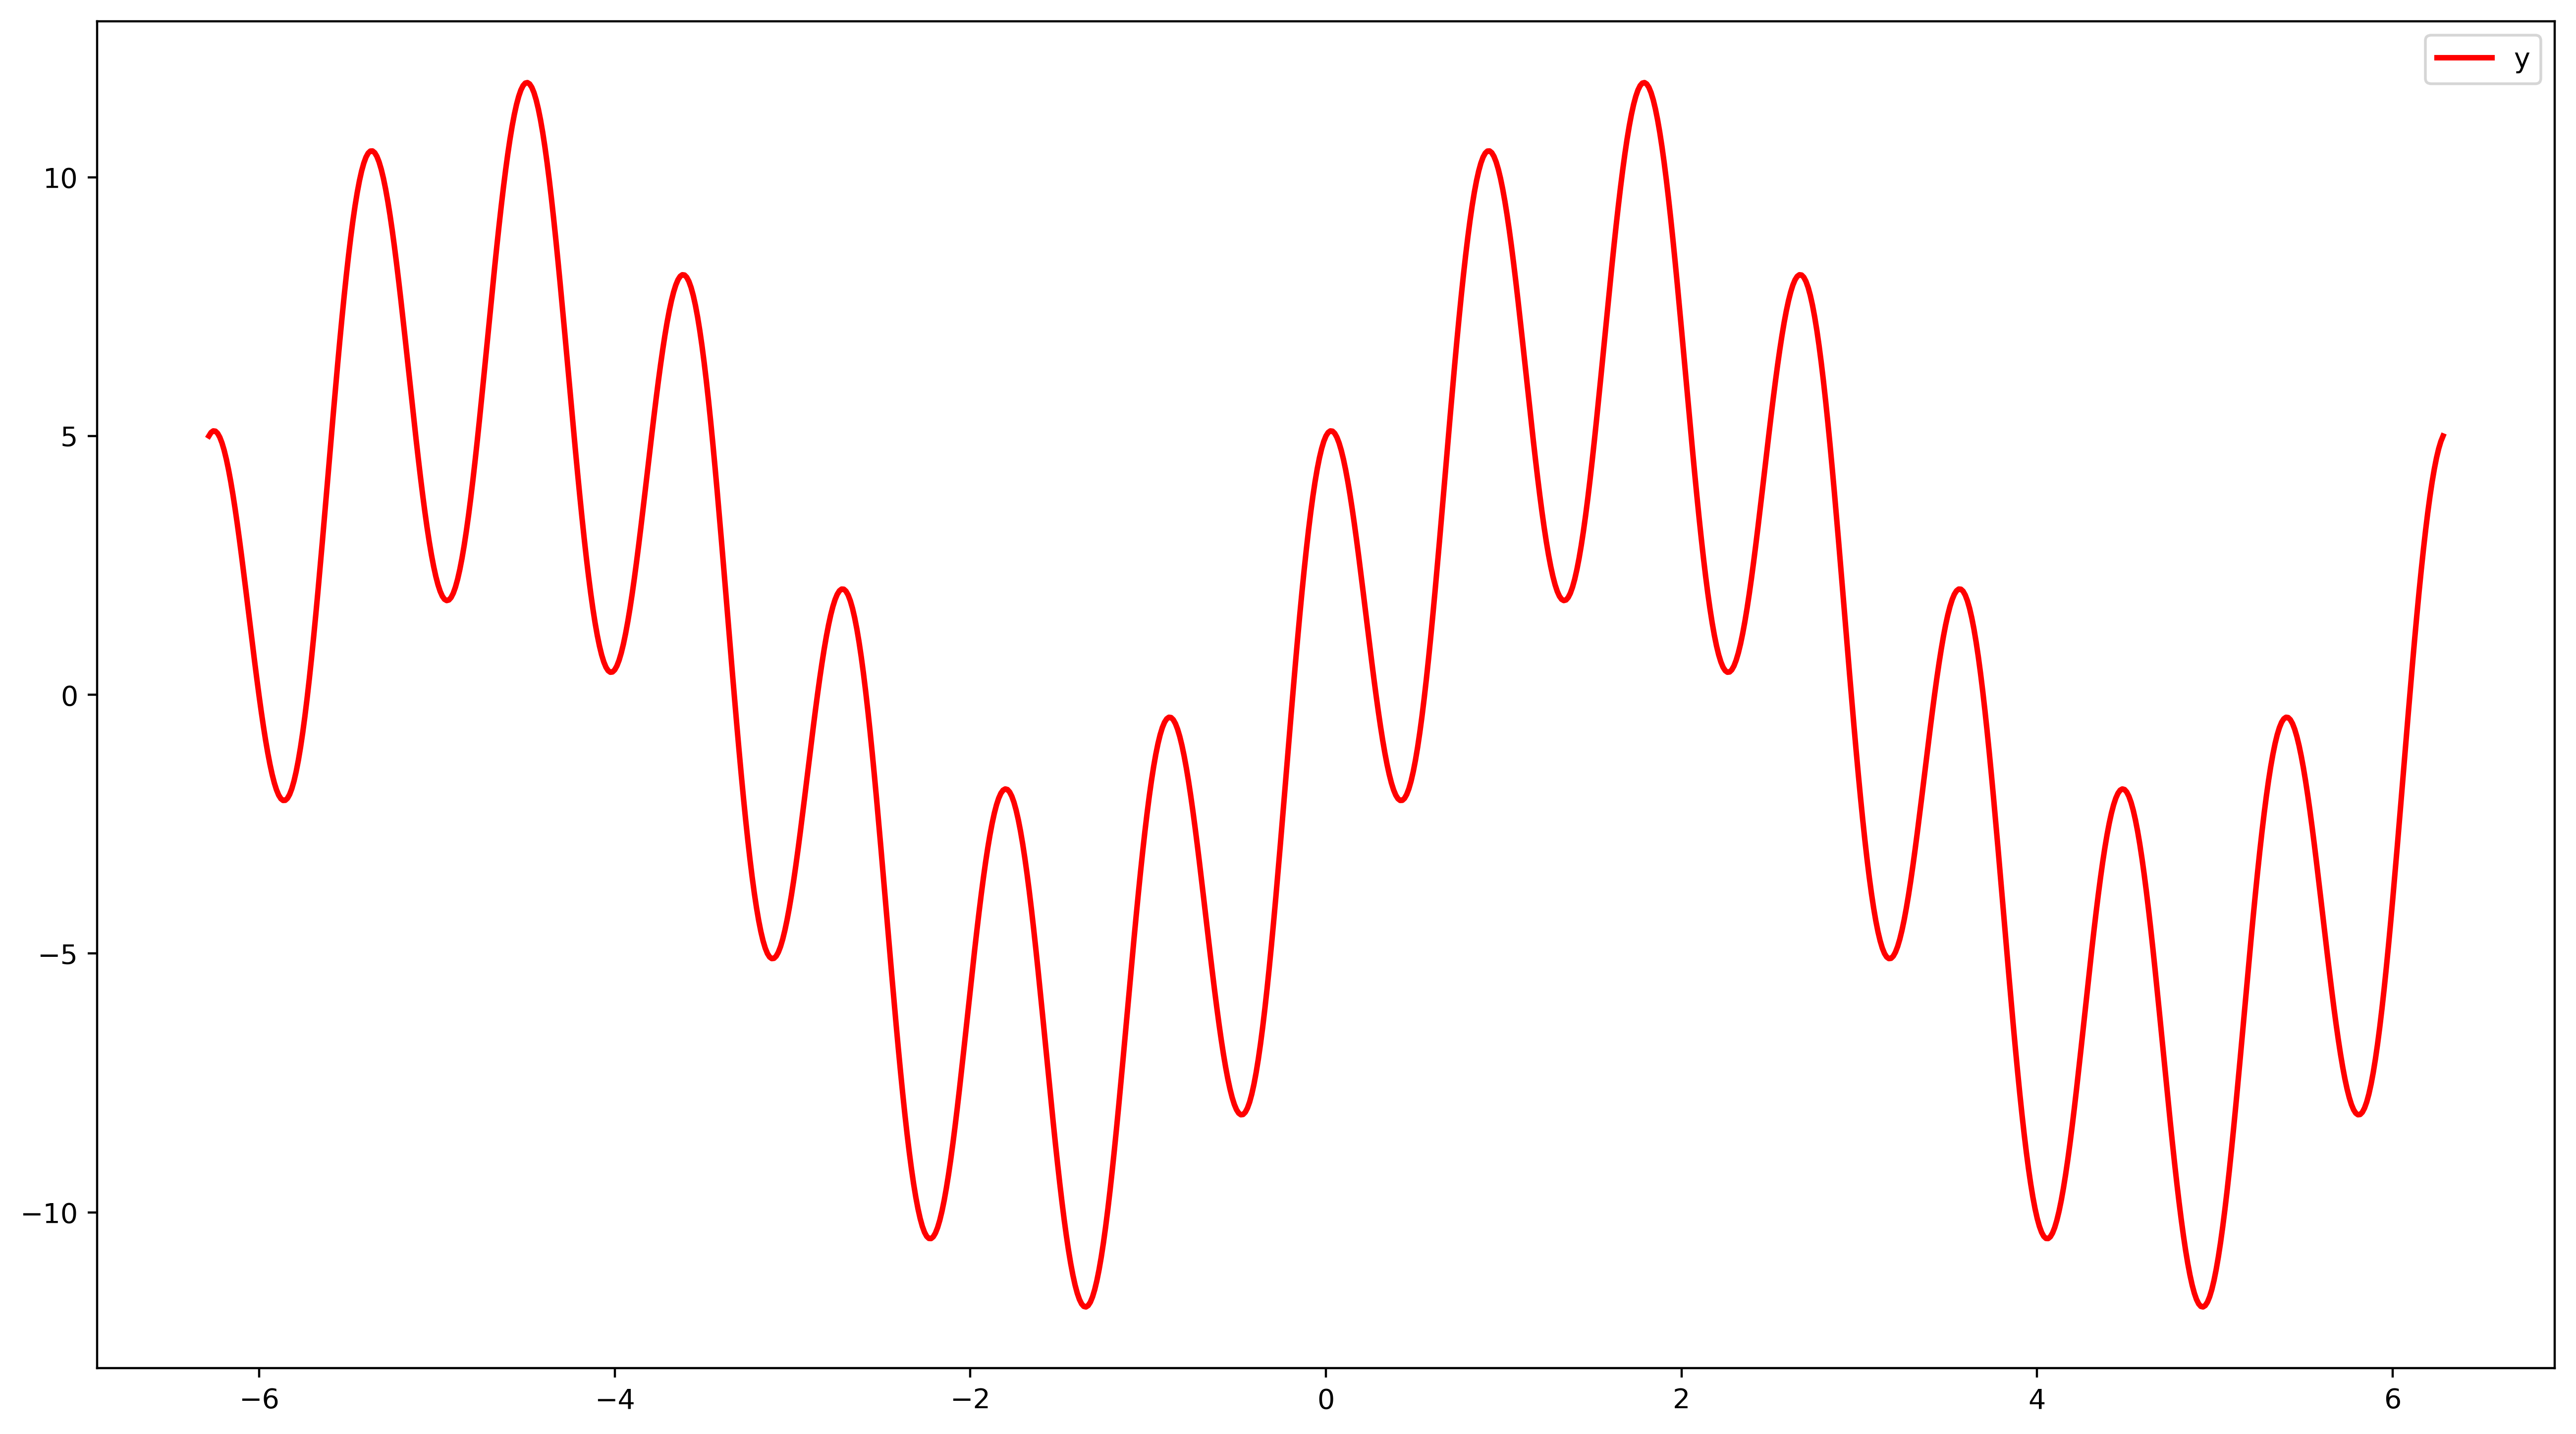

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y, color='red', lw=2, label='y')
plt.legend()
plt.show()

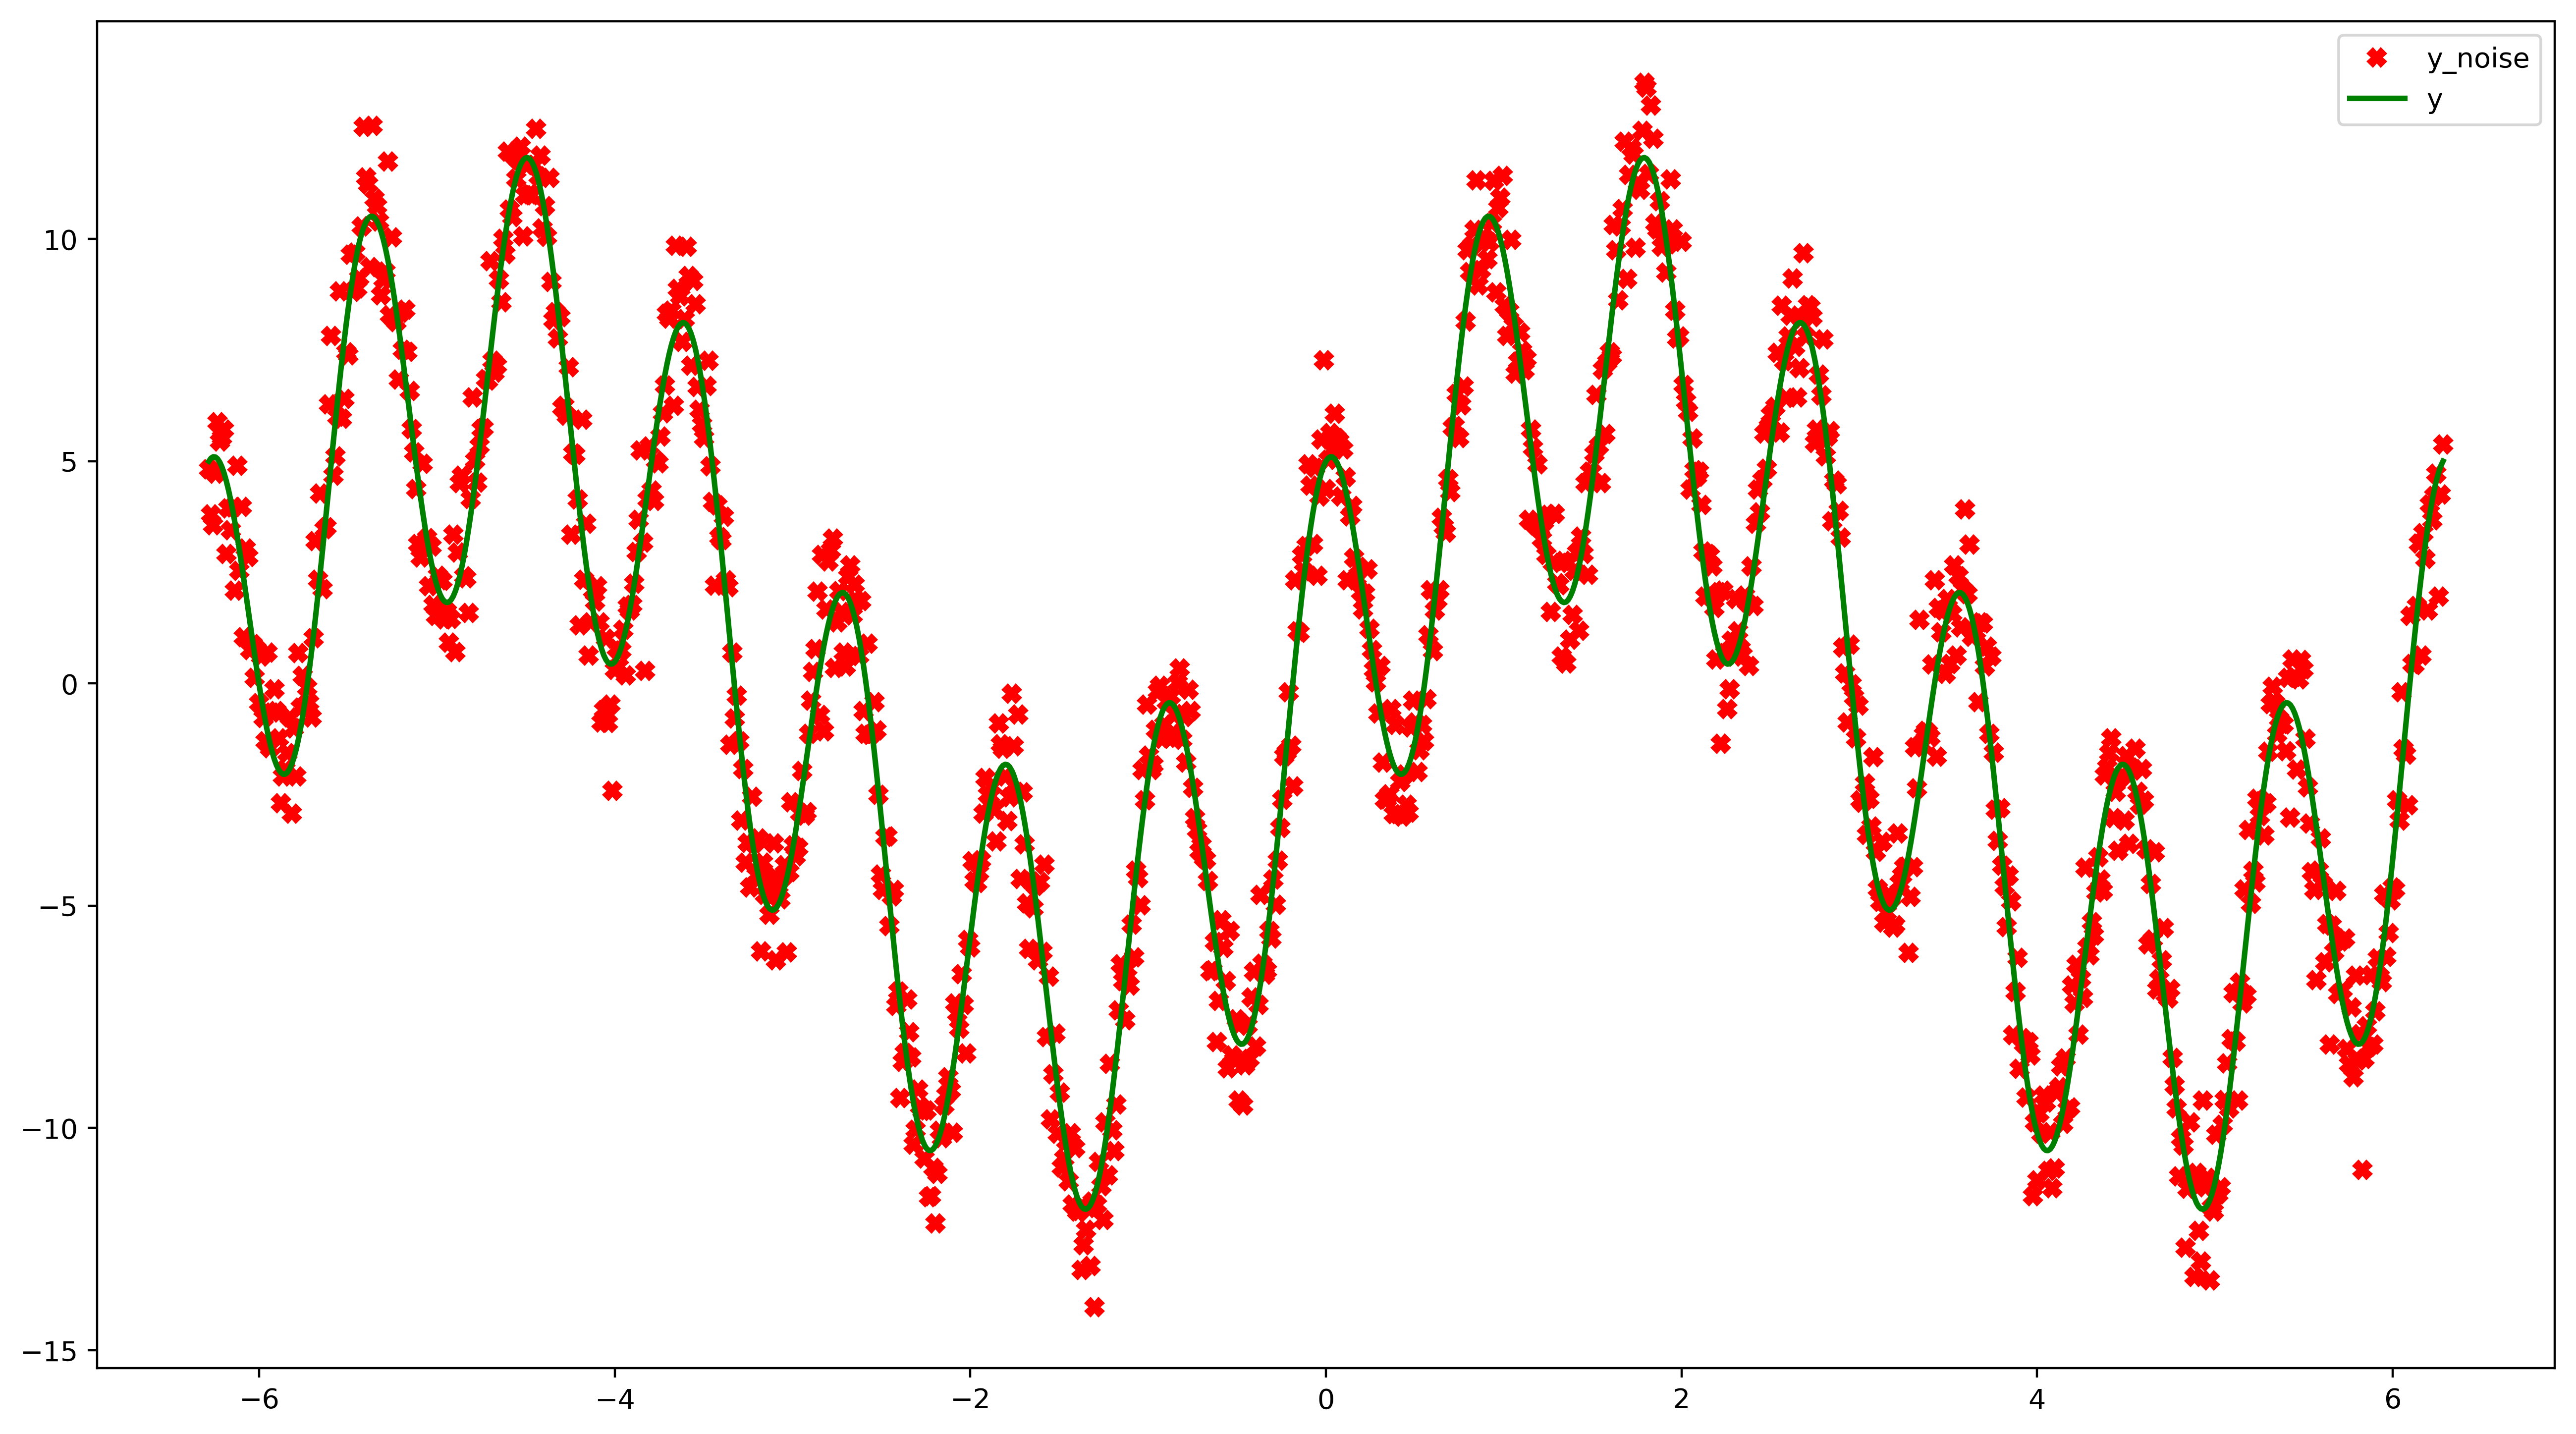

In [18]:
n = len(x)
y_noise = y + normal(loc=0.0, scale=1.0, size=n)
fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(x, y_noise, 'Xr', label='y_noise')
subplot.plot(x, y, color='green', lw=2, label='y')
plt.legend()
plt.show()

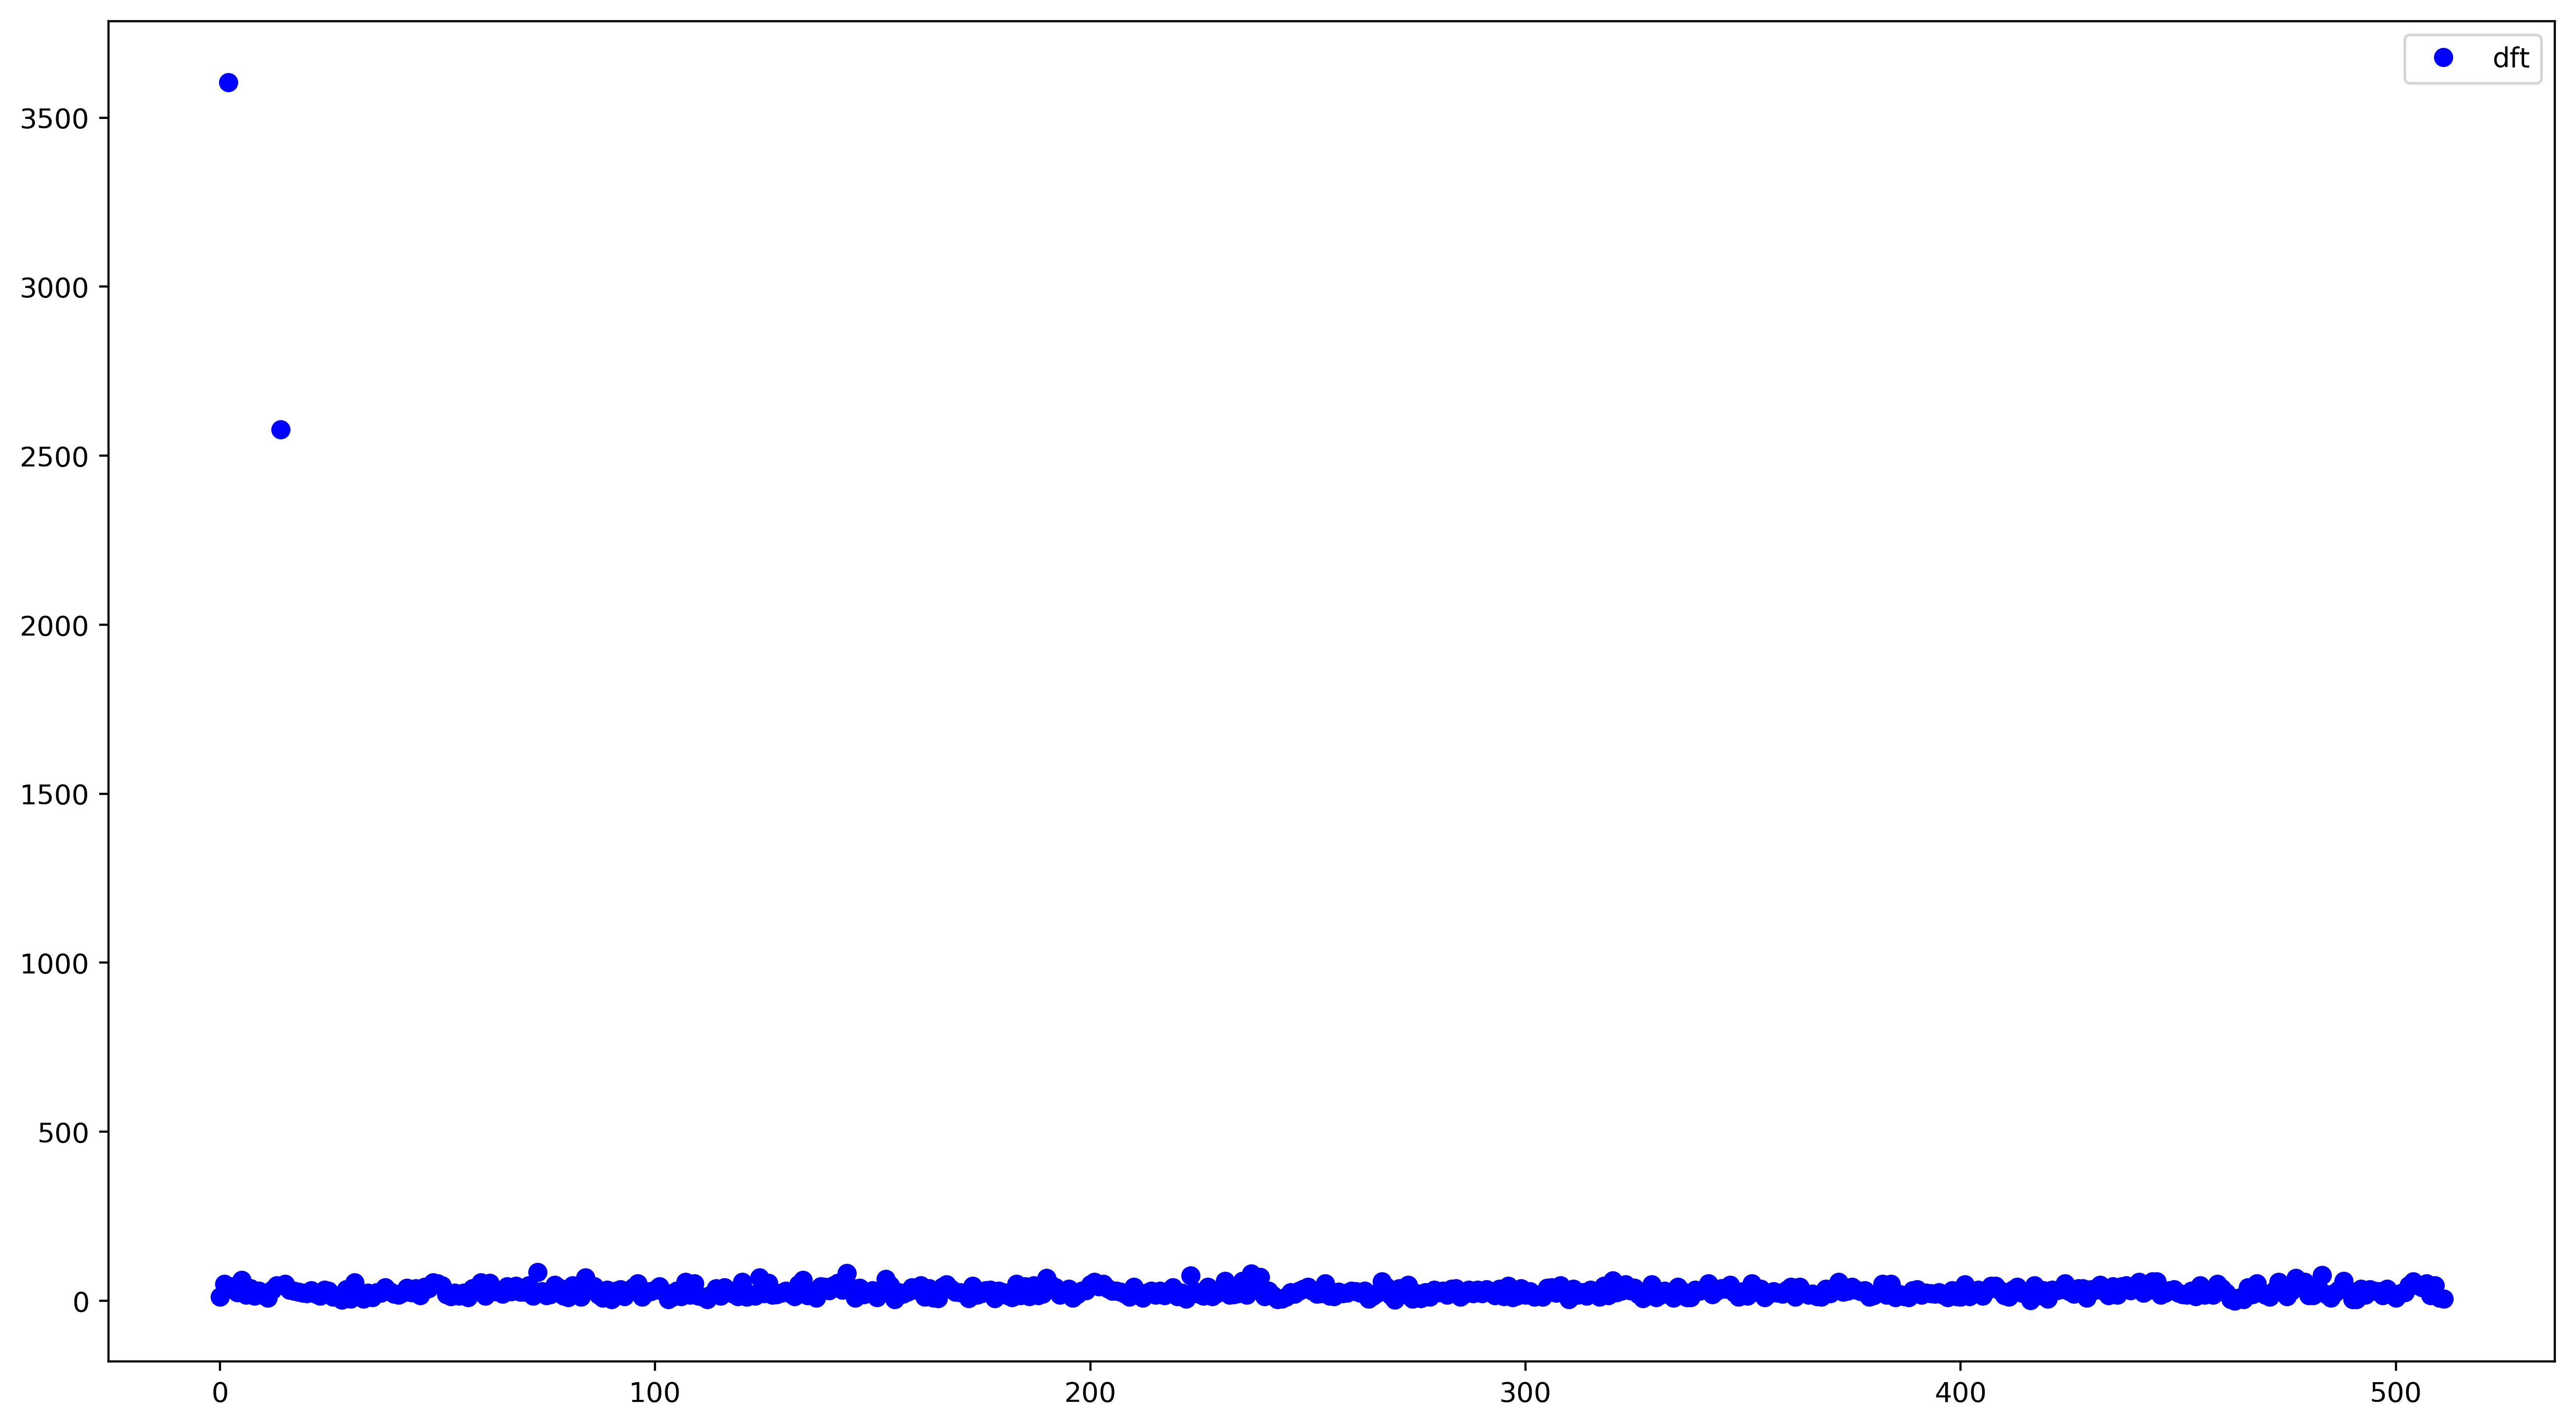

In [22]:
x_upper = dft_matrix(n)
dft = x_upper @ y_noise

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor='#FFFFFF')
subplot.plot(np.abs(dft[:n // 2]), 'bo', label='dft')
plt.legend()
plt.show()